<a href="https://colab.research.google.com/github/Elsasser67/DataScience21/blob/main/Projekt/Kaggle_Projekt_Schnell_Theo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Jupyter Notebook is the Notebook that have been used for the Kaggle competition retail-products classification </br>
Kaggle Username is Théo Schnell </br>
Made with Google Colab

# Colab Link

In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 9.4MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=38561a8e7f38f25750905da384019c07da728ab4237dd074063c0d6336bd0ba2
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thoschnell","key":"c97b7dc6ac5e4979e58b1f3088161907"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
 ! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              232KB  2021-06-26 07:50:27           8346        712  1.0              
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5102        402  0.9375           
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1736        143  1.0              
promptcloud/careerbuilder-job-listing-2020                    Careerbuilder Job 

# Download Kaggle Data

In [7]:
! kaggle competitions download -c 'retail-products-classification'

100% 258M/259M [00:00<00:00, 249MB/s]
100% 259M/259M [00:01<00:00, 271MB/s]


In [8]:
! mkdir project

In [9]:
! unzip retail-products-classification.zip -d project

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: project/train/train/B001E6DLOQ.jpg  
  inflating: project/train/train/B001E6DM54.jpg  
  inflating: project/train/train/B001E6DMHW.jpg  
  inflating: project/train/train/B001E6FNQU.jpg  
  inflating: project/train/train/B001E6HVHO.jpg  
  inflating: project/train/train/B001E6HVOC.jpg  
  inflating: project/train/train/B001E6JCR6.jpg  
  inflating: project/train/train/B001E6LAH6.jpg  
  inflating: project/train/train/B001E6LAK8.jpg  
  inflating: project/train/train/B001E6LAUS.jpg  
  inflating: project/train/train/B001E6OCC6.jpg  
  inflating: project/train/train/B001E6TXCU.jpg  
  inflating: project/train/train/B001E6UUT0.jpg  
  inflating: project/train/train/B001E729CK.jpg  
  inflating: project/train/train/B001E76EJ4.jpg  
  inflating: project/train/train/B001E77NJ4.jpg  
  inflating: project/train/train/B001E77TUW.jpg  
  inflating: project/train/train/B001E8133K.jpg  
  inflating: project/t

# Importing libraries

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import pathlib
import os.path
import os
import sklearn
import glob
import csv
from os import path
from keras.preprocessing.image import load_img, img_to_array, image_dataset_from_directory
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications.mobilenet import preprocess_input

In [11]:
Categories = ["Electronics","Sports & Outdoors","Cell Phones & Accessories","Automotive","Toys & Games","Tools & Home Improvement","Health & Personal Care","Beauty","Grocery & Gourmet Food","Office Products","Arts, Crafts & Sewing","Pet Supplies","Patio, Lawn & Garden","Clothing, Shoes & Jewelry","Baby","Musical Instruments","Industrial & Scientific","Baby Products","Appliances","All Beauty","All Electronics",]

# Data Wrangling

## Load CSV Data

In [12]:
data_train = pd.read_csv("project/train.csv")
data_test = pd.read_csv("project/test.csv")

In [13]:
data_train.head()

,ImgId,title,description,categories
0,B000HYL1V6,TUNGSTEN SOLDER PICK WITH HANDLE,Solder Pick for picking up molten solder when ...,"Arts, Crafts & Sewing"
1,B00006HXWY,Write Right 98167 Screen Protector for Sony T615C,We all screen. And we all need to protect thos...,Cell Phones & Accessories
2,B000GAWSBS,Casio Mens DBC310-1 Databank 300 Digital Watch...,"Bringing you precision at a glance, the Casio ...","Clothing, Shoes & Jewelry"
3,B000040JOL,Factory-Reconditioned DEWALT DW260KR Heavy-Dut...,Factory-Reconditioned DEWALT DW260KR Heavy-Dut...,Tools & Home Improvement
4,B00006IB78,Energizer 2 in 1 Light,This twoway light features a bright flashlight...,Health & Personal Care


In [14]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46229 entries, 0 to 46228
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ImgId        46229 non-null  object
 1   title        46228 non-null  object
 2   description  45187 non-null  object
 3   categories   46229 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


### Vizualise Data Characteristics

In [15]:
data_train.groupby('categories').count()

,ImgId,title,description
categories,,,
All Beauty,2200,2200,2190
All Electronics,2200,2199,2176
Appliances,2200,2200,2181
"Arts, Crafts & Sewing",2225,2225,2175
Automotive,2200,2200,1999
Baby,2200,2200,2177
Baby Products,2200,2200,2131
Beauty,2202,2202,2149
Cell Phones & Accessories,2200,2200,2188


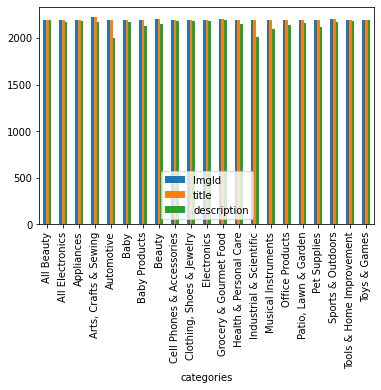

In [16]:
data_train.groupby('categories').count().plot(kind='bar')

We can see that there are entries without description. We shall first clean the data 

### Delete entries without description or title

In [17]:
np.where(pd.isnull(data_train))

(array([   68,   233,   250, ..., 46049, 46064, 46177]),
 array([2, 2, 2, ..., 2, 2, 2]))

In [18]:
data_train = data_train.drop(index=np.where(pd.isnull(data_train))[0])

In [19]:
data_train.groupby('categories').count()

,ImgId,title,description
categories,,,
All Beauty,2190,2190,2190
All Electronics,2176,2176,2176
Appliances,2181,2181,2181
"Arts, Crafts & Sewing",2175,2175,2175
Automotive,1999,1999,1999
Baby,2177,2177,2177
Baby Products,2131,2131,2131
Beauty,2149,2149,2149
Cell Phones & Accessories,2188,2188,2188


### Delete entries with no matching Image Id

We search through the ImgId contained in the csv files of train and test, if there are Id that are not in the image folders

In [20]:
name_list_train = data_train['ImgId'].tolist()
name_list_test = data_test['ImgId'].tolist()
i = 0
for imgid in name_list_train:
  if not path.exists('project/train/train/' + imgid + '.jpg'):    
    data_train = data_train.drop([data_train.index[i]])
    data_train = data_train.reset_index(drop=True)
  else:
    i+=1

i = 0
for imgid in name_list_test:
  if not path.exists('project/test/test/' + imgid + '.jpg'):    
    data_test = data_test.drop([data_test.index[i]])
    data_test = data_test.reset_index(drop=True)
  else:
    i+=1

In [21]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6367 entries, 0 to 6366
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ImgId        6367 non-null   object
 1   title        6367 non-null   object
 2   description  6242 non-null   object
dtypes: object(3)
memory usage: 149.4+ KB


### Delete Image with no entries

The aim here is to remove images contained in the image folder that are not in the ImgId Columns of the csv files </br>
It is the inverse operation of before

In [22]:
for filename in os.listdir('project/train/train/'):
  if not filename.split('.jpg')[0] in data_train['ImgId'].values:
    os.remove('project/train/train/' + filename)
    
for filename in os.listdir('project/test/test/'):
  if not filename.split('.jpg')[0] in data_test['ImgId'].values:
    os.remove('project/test/test/' + filename)

In [23]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6367 entries, 0 to 6366
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ImgId        6367 non-null   object
 1   title        6367 non-null   object
 2   description  6242 non-null   object
dtypes: object(3)
memory usage: 149.4+ KB


## Split CSV Data into Train and Validation Data

Here we shuffle the data, and then divide it between train data and validation data

In [24]:
data_train = data_train.sample(frac=1).reset_index(drop=True)

data_train, data_val = sklearn.model_selection.train_test_split(data_train, test_size = 0.2, random_state = 1)

## Read Image Data

Creation of Numpy arrays that are containing the images </br>
These will be loaded with the load_img function that shall load them in rgb directly

In [25]:
name_list_train = data_train['ImgId'].tolist()
name_list_val = data_val['ImgId'].tolist()
name_list_test = data_test['ImgId'].tolist()
i = 0
img_train = []
for imgid in name_list_train:
  if path.exists('project/train/train/' + imgid + '.jpg'):
    image = tf.keras.preprocessing.image.load_img('project/train/train/' + imgid + '.jpg', color_mode='rgb', interpolation='Nearest')
    img_train.append(image)
    i+=1
  else:
    data_train = data_train.drop([data_train.index[i]])
    data_train = data_train.reset_index(drop=True)

counter = 0
for imgid in img_train:
  input_arr = keras.preprocessing.image.img_to_array(imgid)
  img_train[counter] = input_arr
  counter += 1

i = 0
img_val = []
for imgid in name_list_val:
  if path.exists('project/train/train/' + imgid + '.jpg'):
    image = tf.keras.preprocessing.image.load_img('project/train/train/' + imgid + '.jpg', color_mode='rgb', interpolation='Nearest')
    img_val.append(image)
    i+=1
  else:
    data_val = data_val.drop([data_val.index[i]])
    data_val = data_val.reset_index(drop=True)

counter = 0
for imgid in img_val:
  input_arr = keras.preprocessing.image.img_to_array(imgid)
  img_val[counter] = input_arr
  counter += 1

In [26]:
img_train = np.asarray(img_train)
img_val = np.asarray(img_val)

The data contained in data_train are now synchronized with the images and contains only data without NaN and only images that are contained in the folder image

## Vizualize an image

Perfect for preventing scuff marks and dirty foot prints on the back of mom and dad's car seats. A clear vinyl cover blocks out dirt and shoe prints from seat.  The Seat Back Protector now features a new buckle attachment system.  No more "sticking" anything to the back of your car seats.  Now attaches at headrest and base of seat by adjustable buckles.  Also comes in 2-Packs for both seats!
Baby


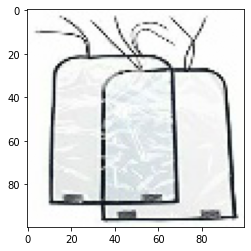

In [27]:
plt.imshow(img_train[10000]/255)
print(data_train.iloc[10000]['description'])
print(data_train.iloc[10000]['categories'])

Professional Adult Dog Rice & Chicken Low-Fat Formula Dry Dog Food is a complete Health System that provides your less active adult dog with optimal nutrition for optimal health. This formula is enhanced with antioxidants to protect your adult dog's overall health, fresh chicken for great taste, fatty acids for healthy skin and coat and many other features to help your adult dog live a happy, healthy life.
Pet Supplies


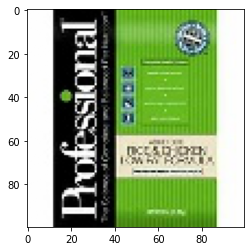

In [28]:
plt.imshow(img_val[8000]/255)
print(data_val.iloc[8000]['description'])
print(data_val.iloc[8000]['categories'])

# Data Vizualisation

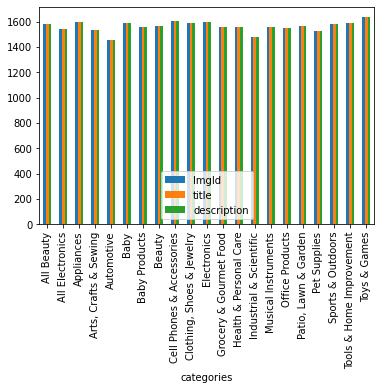

In [29]:
data_train.groupby('categories').count().plot(kind='bar')

We can see that there are a mean of 1500 products for each categories in the train dataset

In [30]:
nbWordsDescription = np.array([])
nbWordsTitle = np.array([])
for index, row in data_train.iterrows():
  nbWordsDescription = np.append(nbWordsDescription, len(row['description'].split()))
  nbWordsTitle = np.append(nbWordsTitle, len(row['title'].split()))

(array([  0., 125., 174., 280., 431., 534., 529., 555., 458., 475., 416.,
        410., 436., 395., 314., 333., 307., 359., 341., 315., 291., 325.,
        347., 332., 365., 312., 286., 314., 287., 381., 261., 284., 328.,
        305., 349., 309., 300., 325., 320., 324., 353., 314., 311., 411.,
        294., 281., 280., 230., 266., 262., 272., 245., 231., 227., 253.,
        210., 220., 208., 186., 209., 201., 216., 192., 180., 204., 227.,
        175., 239., 206., 183., 188., 173., 161., 188., 154., 186., 144.,
        144., 145., 157., 170., 174., 177., 148., 158., 149., 139., 154.,
        133., 122., 123., 122., 146., 126., 126., 100., 104.,  88., 102.,
        100.,  98.,  95., 106.,  88., 100., 130.,  92., 104.,  83.,  75.,
         94.,  83.,  92.,  92.,  95.,  65.,  58.,  68.,  79.,  86.,  72.,
         92.,  78.,  74.,  76.,  60.,  63.,  68.,  73.,  75.,  86.,  87.,
         61.,  69.,  84.,  64.,  54.,  65.,  62.,  68.,  56.,  65.,  71.,
         54.,  59.,  58.,  50.,  42., 

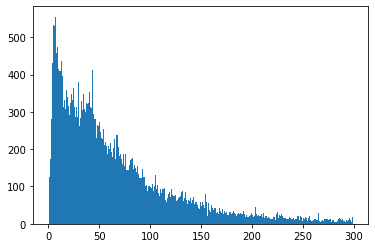

In [31]:
plt.hist(nbWordsDescription, bins=np.arange(300))

(array([0.000e+00, 1.060e+02, 4.280e+02, 1.081e+03, 2.408e+03, 3.864e+03,
        4.301e+03, 4.310e+03, 3.671e+03, 3.135e+03, 2.419e+03, 1.751e+03,
        1.367e+03, 9.840e+02, 6.620e+02, 5.030e+02, 3.210e+02, 2.660e+02,
        2.130e+02, 1.480e+02, 1.250e+02, 7.000e+01, 8.100e+01, 8.400e+01,
        6.900e+01, 5.400e+01, 5.100e+01, 3.800e+01, 2.400e+01, 1.900e+01,
        2.100e+01, 3.100e+01, 4.200e+01, 4.400e+01, 2.500e+01, 1.300e+01,
        1.200e+01, 1.600e+01, 1.400e+01, 1.500e+01, 7.000e+00, 3.000e+00,
        4.000e+00, 6.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 3.000e+00,
        2.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 49 Patch objects>)

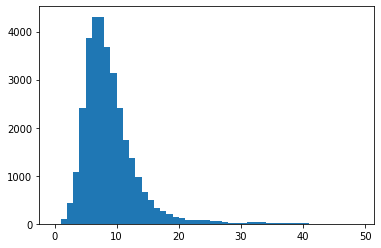

In [32]:
plt.hist(nbWordsTitle, bins=np.arange(50))

In [33]:
print("Minimum Number of words in description : ",nbWordsDescription.min(),"\nMaximum Number of words in description : ", nbWordsDescription.max(),"\nMean Number of words in description : ", nbWordsDescription.mean())

Minimum Number of words in description :  1.0 
Maximum Number of words in description :  1953.0 
Mean Number of words in description :  75.89686358099878


In [34]:
print("Minimum Number of words in title : ",nbWordsTitle.min(),"\nMaximum Number of words in title : ", nbWordsTitle.max(),"\nMean Number of words in title : ", nbWordsTitle.mean())

Minimum Number of words in title :  1.0 
Maximum Number of words in title :  89.0 
Mean Number of words in title :  8.444183922046285


We can see that the mean number of words in description is 75 Words, and in the title 8 Words

In [35]:
del nbWordsDescription, nbWordsTitle

# Text preparation

The aim here is to prepare the title and the description for the model. First, the title and the description are joined.
Then, the words are tokenized.

In [36]:
text_train = data_train["title"] + " " + data_train["description"]
text_val = data_val["title"] + " " + data_val["description"]
text_test = data_test["title"] + " " + data_test["description"]

In [37]:
text_train = text_train.astype(str)
text_val = text_val.astype(str)
text_test = text_test.astype(str)

In [38]:
max_words = 2000
tokenize = tf.keras.preprocessing.text.Tokenizer(num_words = max_words)

In [39]:
tokenize.fit_on_texts(text_train)
train_text = tokenize.texts_to_matrix(text_train)
val_text = tokenize.texts_to_matrix(text_val)
test_text = tokenize.texts_to_matrix(text_test)

In [40]:
train_text

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

Example of Text classification Model : https://www.kaggle.com/yufengdev/bbc-text-categorization

# Model Building

In [41]:
from __future__ import print_function
import tensorflow.keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [42]:
batch_size = 32
num_categories = 21 #fixed!
epochs = 10

## Categorie extraction

Extraction of the categories and by the way one hot encoding them

In [43]:
train_categories_column = data_train.loc[:,'categories'].values
val_categories_column = data_val.loc[:,'categories'].values

In [44]:
counter = 0
for i in train_categories_column:
  train_categories_column[counter] = Categories.index(i)
  counter += 1

counter = 0
for i in val_categories_column:
  val_categories_column[counter] = Categories.index(i)
  counter += 1

In [45]:
train_categories_column = np.asarray(train_categories_column).astype(int)
val_categories_column = np.asarray(val_categories_column).astype(int)

train_categories_column = pd.get_dummies(train_categories_column).values
val_categories_column = pd.get_dummies(val_categories_column).values

In [46]:
print(val_categories_column[0])
print(train_categories_column)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Text Model

Building of the Text Model through a Sequential Model

In [47]:
text_model = tf.keras.models.Sequential()
text_model.add(keras.layers.Dense(1024, input_shape=(max_words,)))
text_model.add(keras.layers.Activation('relu'))

## MobileNet

Building of a MobileNet Model for the Image Classification

In [48]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras import layers
from tensorflow.keras.applications.mobilenet import MobileNet

In [49]:
num_classes = 21
input_tensor = Input(shape=(100,100,3))
preprocess = tf.keras.applications.mobilenet.preprocess_input(input_tensor)
model = MobileNet(input_tensor=input_tensor, include_top=False, weights=None, classes=21)(preprocess)
output = tf.keras.layers.Flatten()(model)
img_model = tf.keras.Model(inputs=input_tensor, outputs= output)

https://www.tensorflow.org/tutorials/load_data/images

## Concatenation and fit of both models

This part shall concatenate both models, and fit them

In [50]:
merge_model = keras.layers.Concatenate()([img_model.output, text_model.output])

In [51]:
final_layer = tf.keras.layers.Dense(21, activation='softmax')(merge_model)

In [52]:
final_model = tf.keras.Model(inputs=[img_model.input, text_model.input], outputs=final_layer)

In [53]:
final_model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy'],
    run_eagerly=True
)

In [54]:
final_model.fit (
  [img_train, train_text],
  train_categories_column,
  validation_data=([img_val, val_text], val_categories_column),
  epochs=5
)

Epoch 1/5
1027/1027 [==============================] - 125s 92ms/step - loss: 1.4852 - accuracy: 0.5975 - val_loss: 0.9445 - val_accuracy: 0.7103
Epoch 2/5
1027/1027 [==============================] - 93s 90ms/step - loss: 0.6451 - accuracy: 0.8005 - val_loss: 0.9012 - val_accuracy: 0.7294
Epoch 3/5
1027/1027 [==============================] - 93s 91ms/step - loss: 0.3875 - accuracy: 0.8820 - val_loss: 0.9755 - val_accuracy: 0.7285
Epoch 4/5
1027/1027 [==============================] - 92s 90ms/step - loss: 0.2178 - accuracy: 0.9387 - val_loss: 1.0874 - val_accuracy: 0.7305
Epoch 5/5
1027/1027 [==============================] - 94s 91ms/step - loss: 0.1268 - accuracy: 0.9690 - val_loss: 1.2294 - val_accuracy: 0.7332


# Result CSV

We apply then the model to the test data, and create the CSV File

In [55]:
import csv

In [56]:
with open('result.csv', 'w') as myfile:
    wr = csv.writer(myfile, delimiter=',',quotechar='|',quoting=csv.QUOTE_MINIMAL)
    wr.writerow(['ImgId','category'])
    for index, row in data_test.iterrows():
      img_test = tf.keras.preprocessing.image.load_img('project/test/test/' + row[0] + '.jpg')
      img_predict = np.array([keras.preprocessing.image.img_to_array(img_test)])
      prediction = final_model.predict([img_predict, np.array([test_text[index]])])
      wr.writerow([row[0],prediction.argmax()])